In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#read uil db
df = pd.read_csv('all_results_with_codes.csv', encoding='latin-1')

df['Classification'] = df['Classification'].str.lower()
df['Conference'] = df['Conference'].str.upper()

# in the conference column, replace values such as 'AAAAAA' as '6A'
df['Conference'] = df['Conference'].str.replace('AAAAAA', '6A')
df['Conference'] = df['Conference'].str.replace('AAAAA', '5A')
df['Conference'] = df['Conference'].str.replace('AAAA', '4A')
df['Conference'] = df['Conference'].str.replace('AAA', '3A')
df['Conference'] = df['Conference'].str.replace('AA', '2A')
df['Conference'] = df['Conference'].str.replace('CCC', '3C')
df['Conference'] = df['Conference'].str.replace('CC', '2C')
df['Conference'] = df['Conference'].str.replace('BBBBBB', '6B')
df['Conference'] = df['Conference'].str.replace('BBBBB', '5B')
df['Conference'] = df['Conference'].str.replace('BBBB', '4B')
df['Conference'] = df['Conference'].str.replace('BBB', '3B')
df['Conference'] = df['Conference'].str.replace('BB', '2B')
df['Conference'] = df['Conference'].str.replace('3C B', '3C')


/Users/blainecowen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# group the sightreading average by conference, event, and year
df_avg_SR = df.groupby(['Conference', 'Event','Year','Classification'])['Sight Reading Average'].mean().reset_index()
print(df_avg_SR)
# save to csv
df_avg_SR.to_csv('avg_SR.csv', index=False)

     Conference              Event  Year   Classification  \
0            2A   931-Mixed Chorus  2005         combined   
1            2A   931-Mixed Chorus  2005      non-varsity   
2            2A   931-Mixed Chorus  2006         combined   
3            2A   931-Mixed Chorus  2006      non-varsity   
4            2A   931-Mixed Chorus  2006          varsity   
...         ...                ...   ...              ...   
1256          C  935-Treble Chorus  2021   nvar-composite   
1257          C  935-Treble Chorus  2021  sub non-varsity   
1258          C  935-Treble Chorus  2021          varsity   
1259          C  935-Treble Chorus  2022      non-varsity   
1260          C  935-Treble Chorus  2022          varsity   

      Sight Reading Average  
0                  2.670000  
1                  3.670000  
2                  2.000000  
3                  1.330000  
4                  2.232000  
...                     ...  
1256               1.670000  
1257               1.000000

   Conference  Sight Reading Average  Count
0          2A               2.266431    325
1          2B               1.627353     34
2          2C               1.820007  12039
3          3A               2.134249   1384
4          3B               1.518694    643
5          3C               1.569952  12676
6          4A               1.845203   5137
7          5A               1.535466  11109
8          6A               1.329693   6059
9           A               2.311111     45
11          C               2.080224    581


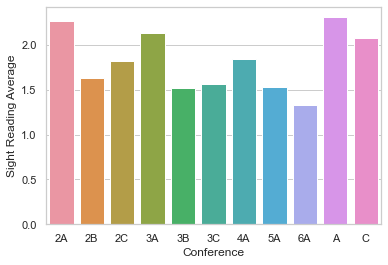

In [4]:
# group the sightreading average by conference, event, and year
df_avg_SR = df.groupby(['Conference'])['Sight Reading Average'].mean().reset_index()
# add a count column
df_avg_SR['Count'] = df.groupby(['Conference'])['Sight Reading Average'].count().reset_index()['Sight Reading Average']
# get rid of conferences with less than 20 entries
df_avg_SR = df_avg_SR[df_avg_SR['Count'] > 20]
print(df_avg_SR)


# graph the average sightreading score by conference
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Conference", y="Sight Reading Average", data=df_avg_SR)
plt.show()




    Conference  Year              Event  Sight Reading Average
414        top  2005  935-Treble Chorus               1.641069
417        top  2006  935-Treble Chorus               1.633855
420        top  2007  935-Treble Chorus               1.505573
423        top  2008  935-Treble Chorus               1.595298
426        top  2009  935-Treble Chorus               1.676991
429        top  2010  935-Treble Chorus               1.468967
432        top  2011  935-Treble Chorus               1.528811
435        top  2012  935-Treble Chorus               1.339372
438        top  2013  935-Treble Chorus               1.519287
441        top  2014  935-Treble Chorus               1.311737
444        top  2015  935-Treble Chorus               1.459347
447        top  2016  935-Treble Chorus               1.469024
450        top  2017  935-Treble Chorus               1.446975
453        top  2018  935-Treble Chorus               1.488314
456        top  2019  935-Treble Chorus               1

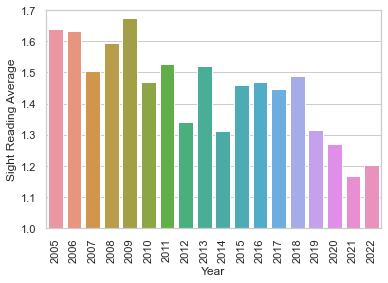

In [5]:
# group the sightreading average by top, and year
# df['Conference'] = df['Conference'].str.replace('5A', 'top')
# df['Conference'] = df['Conference'].str.replace('6A', 'top')
df_avg_SR = df.groupby(['Conference','Year', "Event"])['Sight Reading Average'].mean().reset_index()

df_avg_SR = df_avg_SR[df_avg_SR['Conference'] == 'top']

# filter out only event contains word tenor
df_avg_SR = df_avg_SR[df_avg_SR['Event'].str.contains('Treble')]

print(df_avg_SR)

# graph the average sightreading score by conference
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Year", y="Sight Reading Average", data=df_avg_SR)

# make the x axis labels vertical
plt.xticks(rotation=90)

# set y axis to 1.0-1.5
plt.ylim(1.0, 1.7)


plt.show()





